# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Desired units are degrees C for temps and m/s for wind speed, so need metric
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | galgani
City not found. Skipping...
Processing Record 7 of Set 1 | itea
Processing Record 8 of Set 1 | valdivia
Processing Record 9 of Set 1 | kolno
Processing Record 10 of Set 1 | matay
Processing Record 11 of Set 1 | santiago
Processing Record 12 of Set 1 | pyshma
Processing Record 13 of Set 1 | livingston
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | waitati
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Proc

Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | vershino-darasunskiy
Processing Record 43 of Set 4 | lewistown
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | santa cruz
Processing Record 46 of Set 4 | tymovskoye
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | lircay
Processing Record 0 of Set 5 | popondetta
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | xuanzhou
Processing Record 3 of Set 5 | tibati
Processing Record 4 of Set 5 | pochutla
Processing Record 5 of Set 5 | fuerte olimpo
Processing Record 6 of Set 5 | willowmore
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | polunochnoye
Processing Record 10 of Set 5 | ponta do sol
Processing Record 11 of Set 5 | nuevo progreso
Processing Record 12 of Set 5 | ilhabela
Processing Record 13 of Set

Processing Record 29 of Set 8 | baherden
Processing Record 30 of Set 8 | talaya
Processing Record 31 of Set 8 | teya
Processing Record 32 of Set 8 | itoman
Processing Record 33 of Set 8 | kibala
Processing Record 34 of Set 8 | baracoa
Processing Record 35 of Set 8 | qasigiannguit
Processing Record 36 of Set 8 | santa leopoldina
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | dukat
Processing Record 39 of Set 8 | kholodnyy
Processing Record 40 of Set 8 | selenginsk
Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | avera
Processing Record 43 of Set 8 | svetlyy
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | xichang
Processing Record 46 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 8 | port hedland
Processing Record 48 of Set 8 | muros
Processing Record 49 of Set 8 | gold coast
Processing Record 0 of Set 9 | bilma
Processing Record 1 of Set 9 | staryy nadym
Processing Record 2 of 

Processing Record 17 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 18 of Set 12 | aripuana
Processing Record 19 of Set 12 | psedakh
Processing Record 20 of Set 12 | yomitan
City not found. Skipping...
Processing Record 21 of Set 12 | salalah
Processing Record 22 of Set 12 | waddan
Processing Record 23 of Set 12 | verkhnevilyuysk
Processing Record 24 of Set 12 | kishi
Processing Record 25 of Set 12 | dahuk
Processing Record 26 of Set 12 | ugoofaaru
Processing Record 27 of Set 12 | plettenberg bay
Processing Record 28 of Set 12 | laguna de duero
Processing Record 29 of Set 12 | goderich
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | north platte
Processing Record 33 of Set 12 | katsuura
Processing Record 34 of Set 12 | naze
Processing Record 35 of Set 12 | amuntai
Processing Record 36 of Set 12 | dungarpur
Processing Record 37 of Set 12 | grand island
Processing Record 38 of Set 12 | t

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-14.64,96,100,2.73,CA,1675645752
1,hilo,19.7297,-155.0900,25.71,88,75,2.24,US,1675645754
2,punta arenas,-53.1500,-70.9167,10.06,71,75,9.26,CL,1675645474
3,cherskiy,68.7500,161.3000,-39.53,100,100,1.98,RU,1675645754
4,new norfolk,-42.7826,147.0587,22.18,54,50,2.68,AU,1675645754


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-14.64,96,100,2.73,CA,1675645752
1,hilo,19.7297,-155.0900,25.71,88,75,2.24,US,1675645754
2,punta arenas,-53.1500,-70.9167,10.06,71,75,9.26,CL,1675645474
3,cherskiy,68.7500,161.3000,-39.53,100,100,1.98,RU,1675645754
4,new norfolk,-42.7826,147.0587,22.18,54,50,2.68,AU,1675645754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

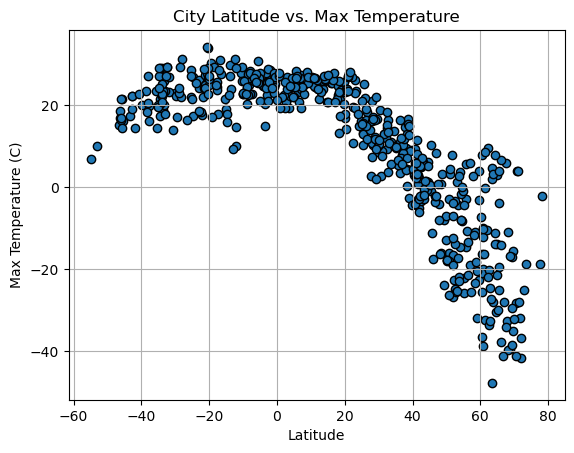

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

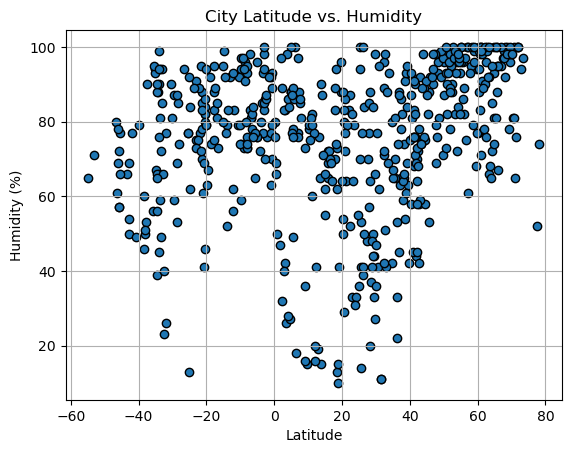

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

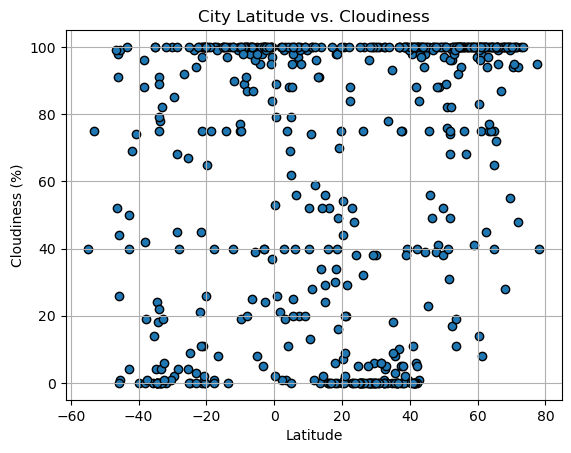

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

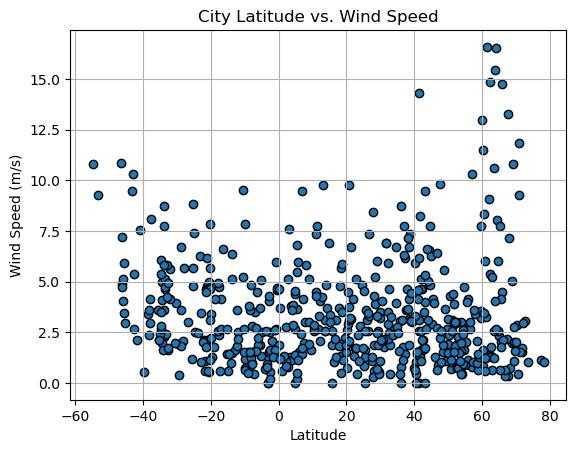

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lr_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_equation_coor = (xc, yc)
    
    line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_equation, line_equation_coor, fontsize=16, color="red")
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-14.64,96,100,2.73,CA,1675645752
1,hilo,19.7297,-155.0900,25.71,88,75,2.24,US,1675645754
3,cherskiy,68.7500,161.3000,-39.53,100,100,1.98,RU,1675645754
5,itea,38.4333,22.4167,4.44,74,100,3.13,GR,1675645755
7,kolno,53.4115,21.9291,-4.24,82,100,1.69,PL,1675645757


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,10.06,71,75,9.26,CL,1675645474
4,new norfolk,-42.7826,147.0587,22.18,54,50,2.68,AU,1675645754
6,valdivia,-39.8142,-73.2459,20.05,79,0,0.54,CL,1675645756
9,santiago,-33.4569,-70.6483,25.86,49,0,4.63,CL,1675645134
12,buala,-8.1450,159.5921,24.94,93,100,4.83,SB,1675645758


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8658187790419487


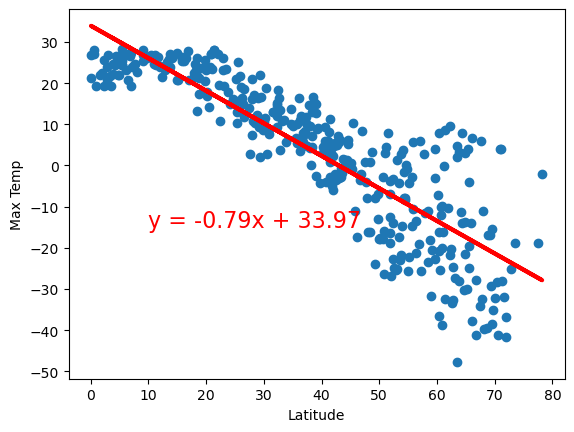

In [15]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
xc = 10
yc = -15

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.41265288107021275


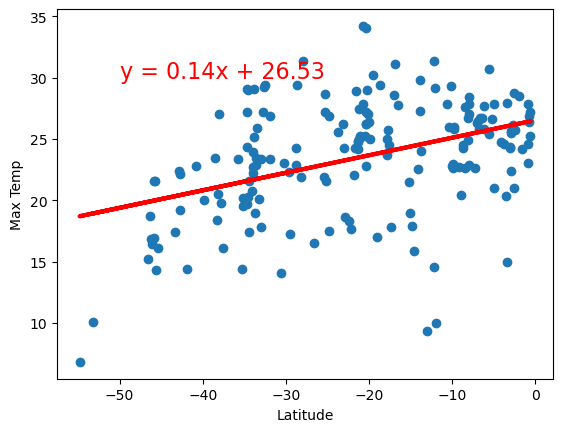

In [16]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
xc = -50
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4532291358875211


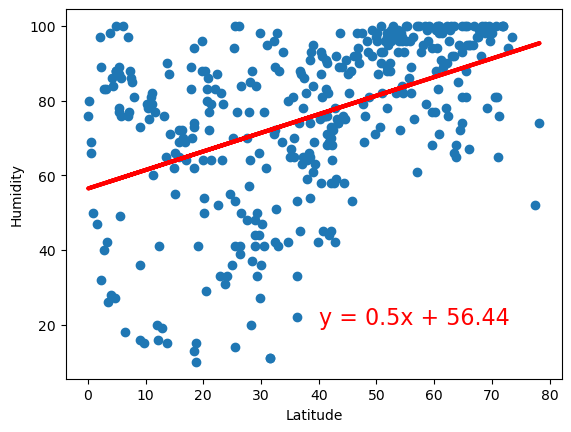

In [17]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
xc = 40
yc = 20

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.37040183722085235


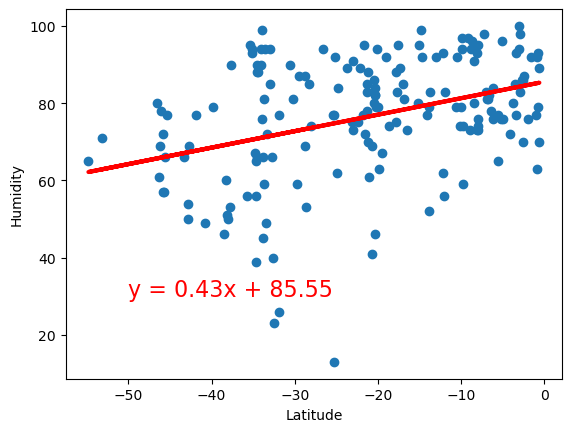

In [18]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
xc = -50
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3682209469063264


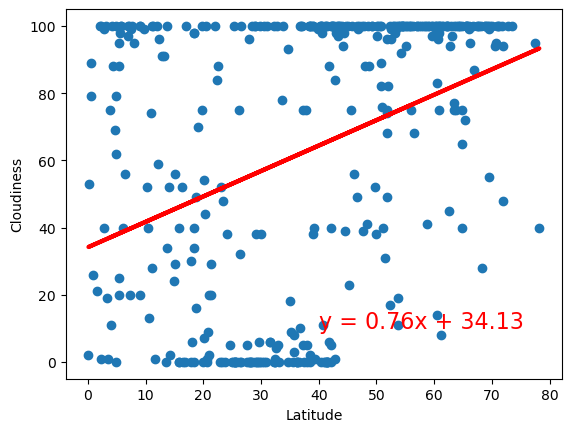

In [19]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
xc = 40
yc = 10

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.4016753372243437


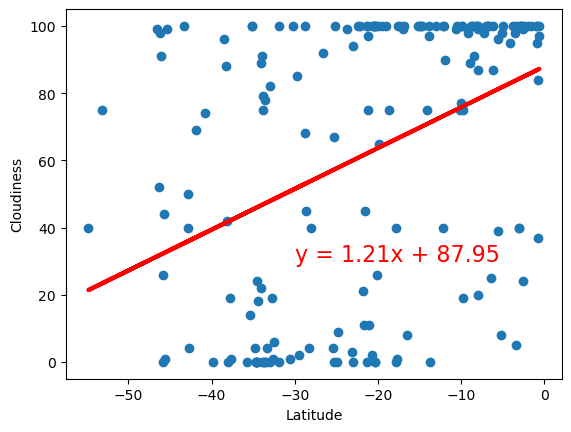

In [20]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
xc = -30
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09200616137730402


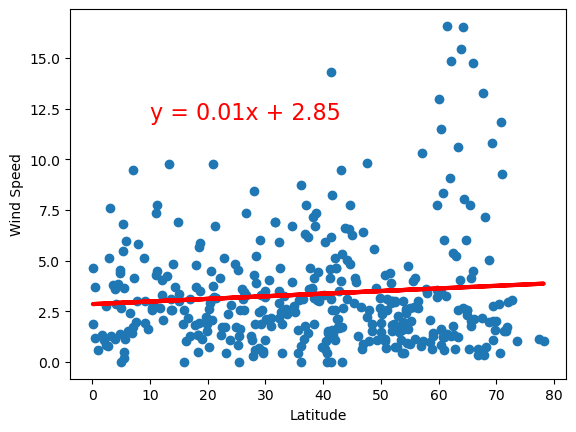

In [21]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
xc = 10
yc = 12

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.443396672926186


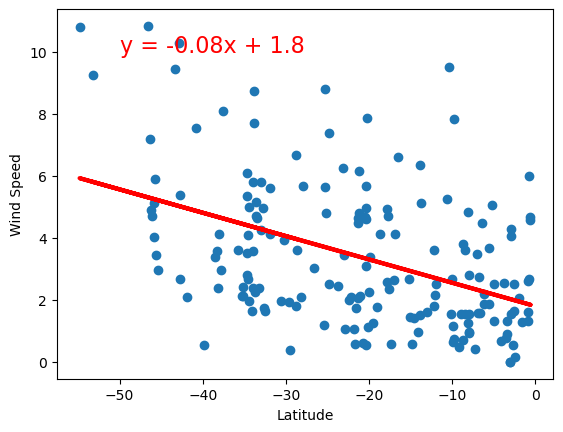

In [23]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
xc = -50
yc = 10

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE